Project 4: Customer Segmentation

Customer segmentation is an unsupervised machine learning technique used to group customers based on similarities in their behavior or attributes. Unlike supervised learning, there are no predefined labels, the algorithm discovers patterns on its own.

This is how k-means clustering works. It's all about finding grouping patterns within a set of unlabelled data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Since this is a learning-focused project, I am using a synthetic but realistic dataset representing customer behavior. The dataset contains:<br>
-Age: Customer age<br>
-Annual Income: Yearly income<br>
-Spending Score: Measure of spending behavior (1–100)

In [2]:
np.random.seed(42)
n_customers = 300
data = pd.DataFrame({
    "Age": np.random.randint(18, 65, n_customers),
    "Annual_Income": np.random.randint(20000, 120000, n_customers),
    "Spending_Score": np.random.randint(1, 100, n_customers)
})
data.head()

,Age,Annual_Income,Spending_Score
0,56,58467,12
1,46,43328,61
2,32,111412,19
3,60,106831,76
4,25,23987,9


K-Means uses distance-based calculations, so features with larger values (like income) can dominate the clustering process.
To prevent this, I have to standardize all features so they have:<br>
Mean = 0<br>
Standard deviation = 1

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

The Elbow Method helps determine the optimal number of clusters (K).
We plot the Within-Cluster Sum of Squares (WCSS) against different values of K and look for a point where improvement slows down. This is the value of k that is required.

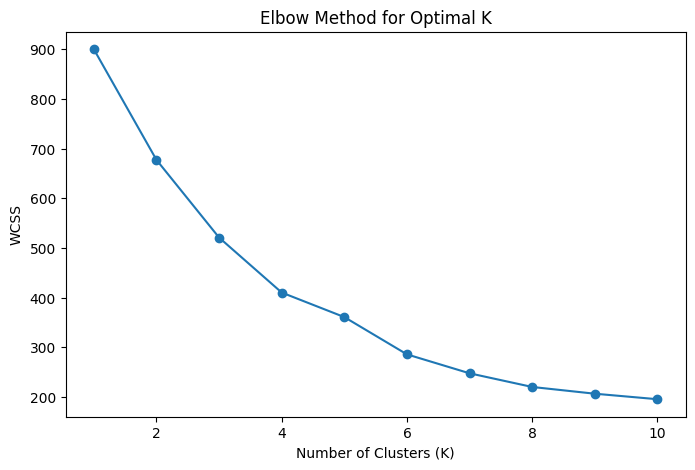

In [4]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

From the elbow plot, I observe that k=4. Now, this is how I train the model.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data)
data["Cluster"].value_counts()

,count
Cluster,
3,81
2,77
1,74
0,68


Since the data has three dimensions, I am using Principal Component Analysis (PCA) to reduce it to two dimensions for visualization, while attempting to preserve most of the variance.

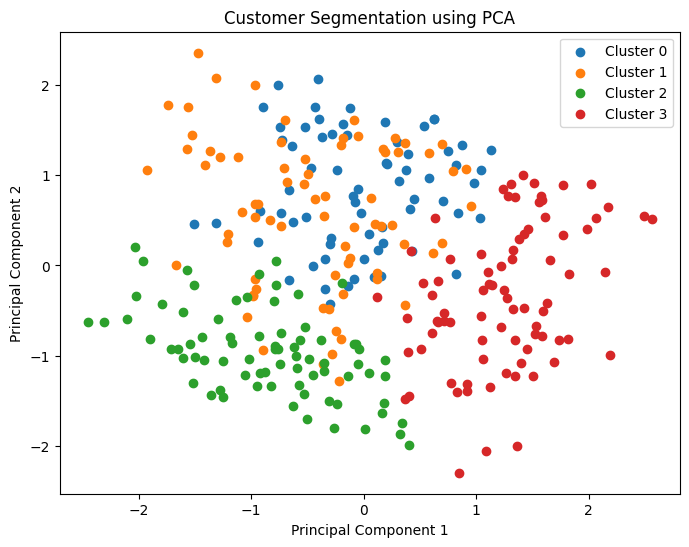

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data["PCA1"] = pca_data[:, 0]
data["PCA2"] = pca_data[:, 1]
plt.figure(figsize=(8,6))
for cluster in range(4):
    plt.scatter(
        data[data["Cluster"] == cluster]["PCA1"],
        data[data["Cluster"] == cluster]["PCA2"],
        label=f"Cluster {cluster}"
    )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA")
plt.legend()
plt.show()

Clustering is only useful if we can interpret the results.
Below is the average profile of customers in each cluster.

In [7]:
data.groupby("Cluster").mean()

,Age,Annual_Income,Spending_Score,PCA1,PCA2
Cluster,,,,,
0,47.029412,90912.250000,76.529412,-0.034519,0.834097
1,25.283784,84469.972973,43.878378,-0.453902,0.599842
2,38.506494,35242.090909,60.883117,-0.852634,-0.958287
3,51.962963,76911.148148,20.962963,1.254183,-0.337270


This project demonstrates how unsupervised learning can uncover hidden patterns in customer data.